# Import file

In [1]:
import pandas as pd
df=pd.read_csv("retail_sales_data_dirty.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5050 non-null   object 
 1   Product     5050 non-null   object 
 2   Category    5050 non-null   object 
 3   Region      4673 non-null   object 
 4   Sales_Rep   5050 non-null   object 
 5   Units_Sold  5050 non-null   int64  
 6   Price       4897 non-null   float64
 7   Revenue     4899 non-null   float64
 8   Cost        5050 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 355.2+ KB


# remove unwanted columns


In [2]:
df.drop('Sales_Rep',axis=1,inplace=True)

# drop rows with missing values

In [3]:
df=df.dropna(subset=(['Region','Price','Revenue']))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4407 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4407 non-null   object 
 1   Product     4407 non-null   object 
 2   Category    4407 non-null   object 
 3   Region      4407 non-null   object 
 4   Units_Sold  4407 non-null   int64  
 5   Price       4407 non-null   float64
 6   Revenue     4407 non-null   float64
 7   Cost        4407 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 309.9+ KB


#  makes all "North America" variations the same.

In [4]:
df = df.copy()  # Optional: to avoid SettingWithCopyWarning
df['Region']=df['Region'].astype("string")
df['Region']=df['Region'].str.replace('N. America','North America')
df['Region']=df['Region'].str.replace('NorthAmerica','North America')
df['Region']=df['Region'].str.replace('NA','North America')

# Trim Product column and apitalize each word of Region column

In [5]:
df['Product'] = df['Product'].str.strip()
df['Region'] = df['Region'].str.title() #capitalize each word.

# Drop Duplicate values

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4363 non-null   object 
 1   Product     4363 non-null   object 
 2   Category    4363 non-null   object 
 3   Region      4363 non-null   string 
 4   Units_Sold  4363 non-null   int64  
 5   Price       4363 non-null   float64
 6   Revenue     4363 non-null   float64
 7   Cost        4363 non-null   float64
dtypes: float64(3), int64(1), object(3), string(1)
memory usage: 306.8+ KB


In [8]:
df


,Date,Product,Category,Region,Units_Sold,Price,Revenue,Cost
0,2024-10-16,Laptop,Electronics,North America,7,816.89,5718.23,3745.61
1,2023-09-08,Tablet,Electronics,Europe,8,638.79,5110.32,3305.38
3,2024-03-08,Laptop,Electronics,North America,4,228.58,914.32,727.13
5,2023-07-23,Router,Accessories,South America,2,263.64,527.28,345.38
6,2024-04-04,Printer,Accessories,Asia,12,650.49,7805.88,4700.08
...,...,...,...,...,...,...,...,...
4994,2023-04-28,Printer,Accessories,North America,18,962.87,17331.66,11840.09
4995,2023-04-26,Monitor,Accessories,South America,12,904.94,10859.28,8224.24
4997,2024-09-24,Router,Accessories,North America,11,539.67,5936.37,4811.13
4998,2023-05-20,Router,Accessories,Asia,17,982.86,16708.62,13258.81


# Rename Column Name

In [9]:
df.rename(columns={"Cost":"Selling Price","Price":"Cost Price"},inplace=True)

# Create Two New Columns

In [11]:
df = df.copy()  # Optional: to avoid SettingWithCopyWarning
df['Profit'] =  df['Selling Price'] - df['Cost Price'] 
df['Profit'] = df['Profit'].round(2)
df['Profit_Margin'] = ((df['Profit'] / df['Revenue']) * 100).round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4363 non-null   object 
 1   Product        4363 non-null   object 
 2   Category       4363 non-null   object 
 3   Region         4363 non-null   string 
 4   Units_Sold     4363 non-null   int64  
 5   Cost Price     4363 non-null   float64
 6   Revenue        4363 non-null   float64
 7   Selling Price  4363 non-null   float64
 8   Profit         4363 non-null   float64
 9   Profit_Margin  4363 non-null   float64
dtypes: float64(5), int64(1), object(3), string(1)
memory usage: 374.9+ KB


# Change data type 

In [12]:
df['Product']=df['Product'].astype("string")
df['Category']=df['Category'].astype("string")
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4363 non-null   datetime64[ns]
 1   Product        4363 non-null   string        
 2   Category       4363 non-null   string        
 3   Region         4363 non-null   string        
 4   Units_Sold     4363 non-null   int64         
 5   Cost Price     4363 non-null   float64       
 6   Revenue        4363 non-null   float64       
 7   Selling Price  4363 non-null   float64       
 8   Profit         4363 non-null   float64       
 9   Profit_Margin  4363 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), string(3)
memory usage: 374.9 KB


# Save File

In [14]:
df.to_csv('retail sales clean dataset.csv', index=False)

In [15]:
df

,Date,Product,Category,Region,Units_Sold,Cost Price,Revenue,Selling Price,Profit,Profit_Margin
0,2024-10-16,Laptop,Electronics,North America,7,816.89,5718.23,3745.61,2928.72,51.22
1,2023-09-08,Tablet,Electronics,Europe,8,638.79,5110.32,3305.38,2666.59,52.18
3,2024-03-08,Laptop,Electronics,North America,4,228.58,914.32,727.13,498.55,54.53
5,2023-07-23,Router,Accessories,South America,2,263.64,527.28,345.38,81.74,15.50
6,2024-04-04,Printer,Accessories,Asia,12,650.49,7805.88,4700.08,4049.59,51.88
...,...,...,...,...,...,...,...,...,...,...
4994,2023-04-28,Printer,Accessories,North America,18,962.87,17331.66,11840.09,10877.22,62.76
4995,2023-04-26,Monitor,Accessories,South America,12,904.94,10859.28,8224.24,7319.30,67.40
4997,2024-09-24,Router,Accessories,North America,11,539.67,5936.37,4811.13,4271.46,71.95
4998,2023-05-20,Router,Accessories,Asia,17,982.86,16708.62,13258.81,12275.95,73.47


# Total Revenue by Product

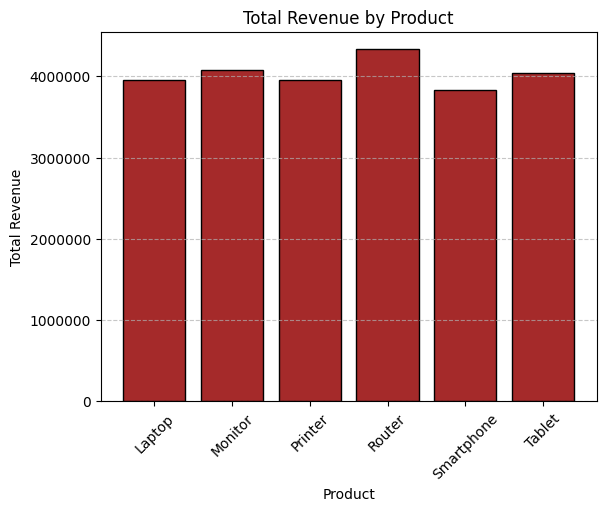

In [17]:
import pandas as pd
df = pd.read_csv('retail sales clean dataset.csv')

import matplotlib.pyplot as plt
product_revenue = df.groupby('Product')['Revenue'].sum()
plt.bar(product_revenue.index, product_revenue.values, color='brown', edgecolor='black')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Ensure that y-axis shows plain numbers (no scientific notation)
plt.show()

# Top-Selling Products

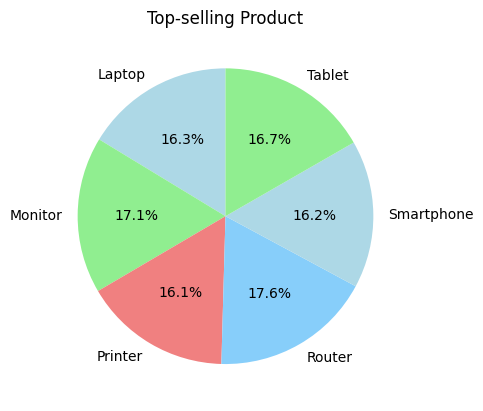

In [18]:
import matplotlib.pyplot as plt

product_sales = df.groupby('Product')['Units_Sold'].sum()
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Top-selling Product')
plt.show()


# Average Profit Margin by Region

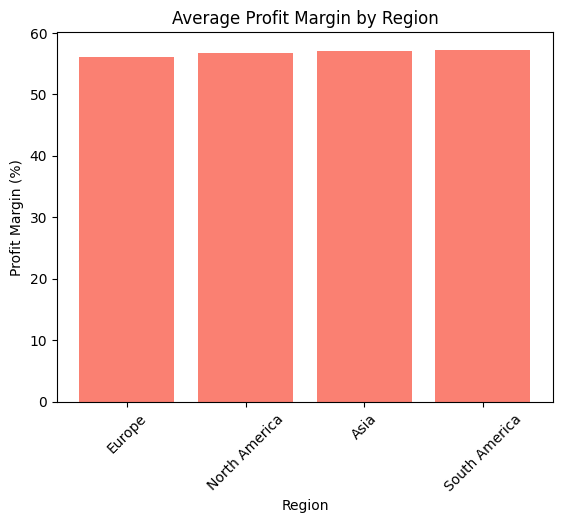

In [19]:
import matplotlib.pyplot as plt
average_profit = df.groupby('Region')['Profit_Margin'].mean().sort_values(ascending=True)
plt.bar(average_profit.index, average_profit.values, color='salmon')
plt.title('Average Profit Margin by Region')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


# Overall Profit Distribution by Category

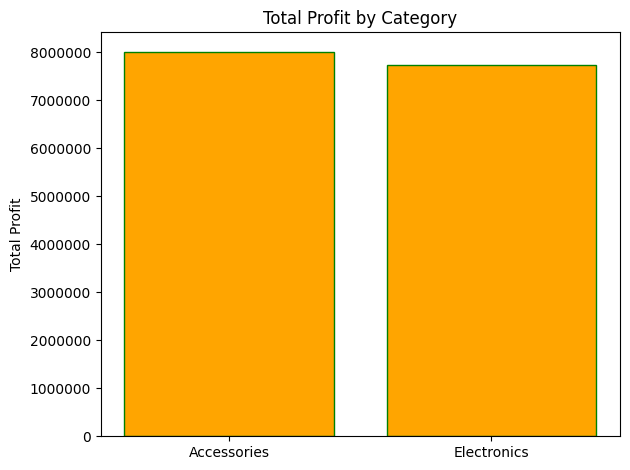

In [20]:
total_profit=df.groupby('Category')['Profit'].sum()
plt.bar(total_profit.index,total_profit.values,color='orange',edgecolor='green')
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


# Revenue vs Profit Comparison

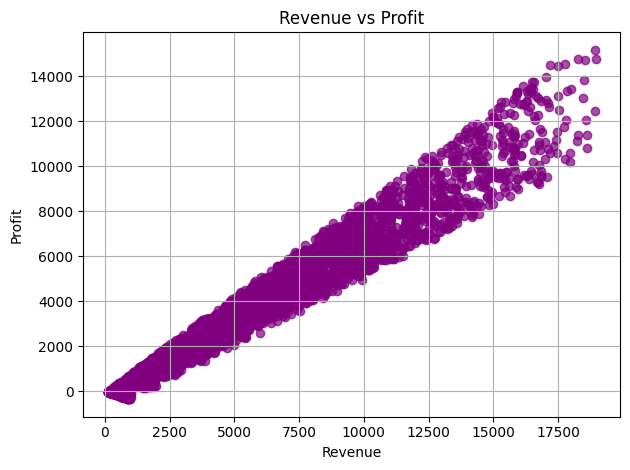

In [21]:
plt.scatter(df['Revenue'], df['Profit'], alpha=0.7, color='purple')
plt.title('Revenue vs Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


# Average Cost Price by Product

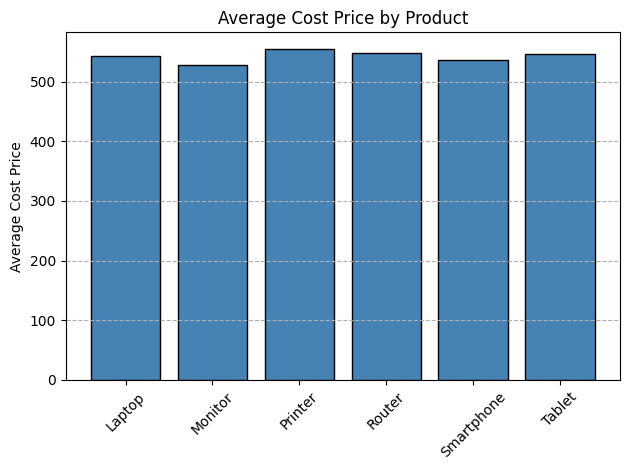

In [22]:
average_cost=df.groupby('Product')['Cost Price'].mean()
plt.bar(average_cost.index,average_cost.values,color='steelblue',edgecolor='black')
plt.title('Average Cost Price by Product')
plt.ylabel('Average Cost Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# Tracking Cost and Selling Price Variations

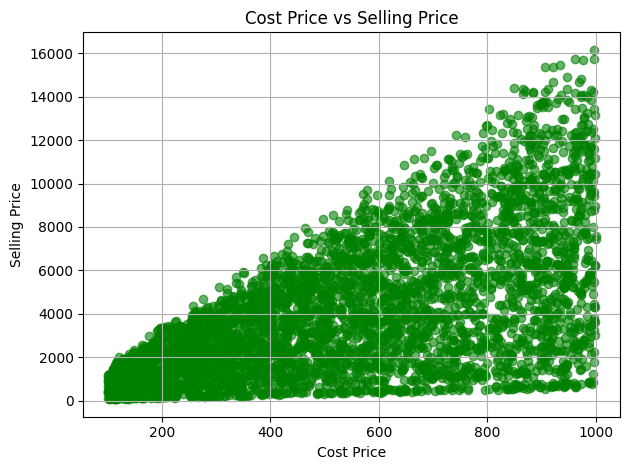

In [8]:
plt.scatter(df['Cost Price'], df['Selling Price'], c='green', alpha=0.6)
plt.title('Cost Price vs Selling Price')
plt.xlabel('Cost Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Profit Trend Over Time

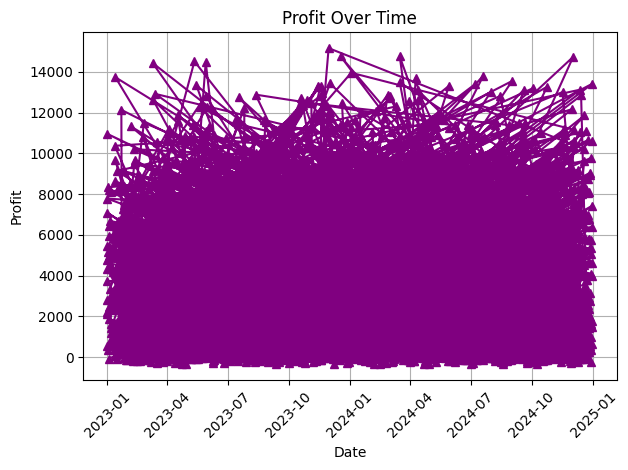

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('retail sales clean dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Profit'], marker='^', linestyle='-', color='purple')
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()